## 1. Lectura de datos

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [2]:
data_full = pd.read_csv('./airbnb-listings-extract.csv',sep=';', decimal='.')
data_full.head().T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat..."
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza Cataluña Catalonia Square is the large...,Plaza Cataluña Catalonia Square is the large...,We're right in the heart of the chic L'Eixampl...,NaN


Observamos que nuestro dataframe tiene 14.780 observaciones y 89 variables.

In [3]:
data_full.shape

(14780, 89)

In [4]:
data_full["City"].value_counts()

Madrid                                 13207
Barcelona                                292
London                                   132
Paris                                    108
马德里                                       52
Palma                                     49
Alcúdia                                   40
Dublin                                    40
Berlin                                    40
New York                                  38
Roma                                      37
Los Angeles                               35
Brooklyn                                  27
Amsterdam                                 26
Wien                                      25
Madrid, Comunidad de Madrid, ES           20
Rome                                      18
Palma de Mallorca                         16
Toronto                                   14
Washington                                14
Inca                                      13
Selva                                     13
Búger     

Observamos que la mayoría de los datos son de apartamentos situados en Madrid, por tanto, voy a realizar el estudio únicamente para apartamentos de Madrid.

In [5]:
data_madrid = data_full[data_full["City"] == "Madrid"]
data_madrid.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",NaN,Metro conde de Casal abajo de casa . Líneas de...,"Pueden usar la nevera , microondas , wifi .",Cualquier cosa Q necesiten estaremos para ayud...,Si son fumadores podéis fumar en un patio Q h...,https://a0.muscache.com/im/pictures/86864154/1...,https://a0.muscache.com/im/pictures/86864154/1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/86864154/1...,25709853,https://www.airbnb.com/users/show/25709853,Vílma,2015-01-06,"Madrid, Community of Madrid, Spain",NaN,within an hour,84.0,NaN,https://a0.muscache.com/im/users/25709853/prof...,https://a0.muscache.com/im/users/25709853/prof...,NaN,3.0,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28007, Spain",NaN,Niño Jesús,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",ES,Spain,40.406953,-3.670894,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",NaN,28.0,NaN,NaN,NaN,NaN,1,5,1,1125,2 weeks ago,NaN,0,3,12,240,2017-04-07,171,2015-06-14,2017-03-22,87.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,4941335,https://www.airbnb.com/rooms/4941335,20170407214119,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,NaN,NaN,En dos agradables sillones puedes tomar un caf...,Te atenderemos en todo lo que necesites. Marta...,No se permite fumar. El estudio está acondicio...,https://a0.muscache.com/im/pictures/69897767/2...,https://a0.muscache.com/im/pictures/69897767/2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/69897767/2...,25465787,https://www.airbnb.com/users/show/25465787,Marta,2015-01-01,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/25465787/prof...,https://a0.muscache.com/im/users/25465787/prof...,Recoletos,1.0,1.0,"email,phone,reviews","Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Recoletos,Salamanca,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,Spain,40.425904,-3.681647,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,58.0,371.0,981.0,100.0,NaN,1,0,2,1125,6 days ago,NaN,4,9,9,15,2017-04-08,52,2015-03-02,2017-02-12,96.0,1

In [6]:
data_madrid.shape

(13207, 89)

## 2. División train/test

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_madrid, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./madrid_train.csv', sep=';', index=False)
test.to_csv('./madrid_test.csv', sep=';', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

data = pd.read_csv('madrid_train.csv', sep=';')
data.head().T

Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


,0,1,2,3,4
ID,13270355,8991818,5310107,16144069,13445117
Listing Url,https://www.airbnb.com/rooms/13270355,https://www.airbnb.com/rooms/8991818,https://www.airbnb.com/rooms/5310107,https://www.airbnb.com/rooms/16144069,https://www.airbnb.com/rooms/13445117
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Madrid Center Sunny Appartment,ROOMS IN MADRID,Attic with terrace Madrid city center -WIFI- cozy,1.- Studio Private ÓPERA/SOL. With Balcony,Habitación para una persona o dos
Summary,"Places of interest: CaixaForum Madrid, Barrio ...",ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...,Attic with a marvellous terrace on top. WIFI V...,"This cozy studio of 18mts 2, is completely ref...",Mi alojamiento es bueno para parejas y aventur...
Space,"Nice appartment in the center of Madrid, with ...",NaN,Home has been reciently reformed. There plent...,NaN,NaN
Description,"Places of interest: CaixaForum Madrid, Barrio ...",ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...,Attic with a marvellous terrace on top. WIFI V...,"This cozy studio of 18mts 2, is completely ref...",Mi alojamiento es bueno para parejas y aventur...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,NaN,NaN,"Right in the city center of Madrid, at Barrio ...",Calle muy privilegiada y céntrica (Calle del A...,NaN


## 3. Análisis exploratorio

Voy a analizar las variables no númericas.

In [9]:
data.select_dtypes(include = 'object').isnull().sum()

Listing Url                         0
Last Scraped                        0
Name                                0
Summary                           383
Space                            2848
Description                         5
Experiences Offered                 0
Neighborhood Overview            3916
Notes                            6576
Transit                          3973
Access                           4566
Interaction                      4543
House Rules                      3722
Thumbnail Url                    1953
Medium Url                       1953
Picture Url                        15
XL Picture Url                   1953
Host URL                            0
Host Name                           2
Host Since                          2
Host Location                      32
Host About                       3995
Host Response Time               1340
Host Thumbnail Url                  2
Host Picture Url                    2
Host Neighbourhood               2620
Host Verific

Voy a eliminar las variables que tienen que ver con los datos del anfitrión y URL.

In [10]:
columnas_a_eliminar = data.columns[data.columns.str.contains('Host|Url')]
data = data.drop(columnas_a_eliminar, axis = 1)

In [11]:
data.select_dtypes(include = 'object').isnull().sum()

Last Scraped                        0
Name                                0
Summary                           383
Space                            2848
Description                         5
Experiences Offered                 0
Neighborhood Overview            3916
Notes                            6576
Transit                          3973
Access                           4566
Interaction                      4543
House Rules                      3722
Street                              0
Neighbourhood                    3567
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed        0
City                                0
State                              38
Zipcode                           350
Market                             38
Smart Location                      0
Country Code                        0
Country                             0
Property Type                       0
Room Type                           0
Bed Type                            0
Amenities   

In [12]:
data['City'].value_counts()

Madrid    10565
Name: City, dtype: int64

In [13]:
data['State'].value_counts()

Comunidad de Madrid             8512
Community of Madrid             1482
Madrid                           514
España                             4
Spain                              3
madrid                             2
Communauté de Madrid               2
MADRID                             2
28                                 1
Espańa                             1
Autonome Gemeinschaft Madrid       1
Madrid \nMadrid                    1
Madrid capital                     1
Usera                              1
Name: State, dtype: int64

In [14]:
data['Country'].value_counts()

Spain    10565
Name: Country, dtype: int64

In [15]:
data['Country Code'].value_counts()

ES    10565
Name: Country Code, dtype: int64

In [16]:
data['Smart Location'].value_counts()

Madrid, Spain     10553
Madrid , Spain       12
Name: Smart Location, dtype: int64

Como estoy trabajando con apartamenos de Madrid, voy a eliminar las columnas City, State, Country, Country Code y Smart Location ya que es información redundante.

In [17]:
data = data.drop(['City', 'State', 'Country', 'Country Code', 'Smart Location'], axis = 1)

Las variables Name, Summary, Description, Market, Space y Neighborhood Overview dan información sobre cómo es el apartamento, ubicación, cómo es el barrio dónde se encuentra... Voy a eliminarlas porque esta información la puedo obtener a través de las variables número de habitaciones, baños, barrio.. 

In [18]:
data = data.drop(['Name', 'Space', 'Description', 'Summary', 'Market', 'Neighborhood Overview'], axis = 1)

La variable Experiences Offered solo contiene none, lo cual no nos ofrece información relevante. Por tanto, la eliminamos.

In [19]:
data['Experiences Offered'].value_counts()

none    10565
Name: Experiences Offered, dtype: int64

In [20]:
data = data.drop(["Experiences Offered"], axis = 1)

Las variables Neighbourhood, Neighbourhood Cleansed y Neighbourhood Group Cleansed se refieren al barrio, asi que me voy a quedar con Neighbourhood y voy a borrar las otras dos.

In [21]:
data = data.drop(['Neighbourhood Group Cleansed', 'Neighbourhood Cleansed'], axis = 1)

Elimino las siguientes variables que dan información sobre las normas del apartamento, la calle, fecha de reviews y fechas de scraping, geolocalización...

In [22]:
data = data.drop(['Last Scraped','Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Street','Zipcode', 'Amenities', 
                  'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Geolocation', 'Features'], axis = 1)

Voy a factorizar las variables Property Type, Room Type, Bed Type, Cancellation Policy y Neighborhood.

In [23]:
from sklearn.preprocessing import LabelEncoder

le_property_type = LabelEncoder()
le_room_type = LabelEncoder()
le_bed_type = LabelEncoder()
le_cancellation_policy = LabelEncoder()
le_neighbourhood = LabelEncoder()

data['Property Type'] = le_property_type.fit_transform(data['Property Type'])
data['Room Type'] = le_room_type.fit_transform(data['Room Type'])
data['Bed Type'] = le_bed_type.fit_transform(data['Bed Type'])
data['Cancellation Policy'] = le_cancellation_policy.fit_transform(data['Cancellation Policy'])
data['Neighbourhood'] = le_neighbourhood.fit_transform(data['Neighbourhood'])

Ahora analizaré las variables numéricas.

In [24]:
data.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10565.0,1.042161e+07,5.495137e+06,1.862800e+04,5.938004e+06,1.155134e+07,1.533683e+07,1.810984e+07
Scrape ID,10565.0,2.017041e+13,4.336143e+00,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Neighbourhood,10565.0,4.465698e+01,1.961934e+01,0.000000e+00,3.000000e+01,4.700000e+01,6.500000e+01,6.500000e+01
Latitude,10565.0,4.042068e+01,2.015124e-02,4.033291e+01,4.041011e+01,4.041882e+01,4.042791e+01,4.051425e+01
Longitude,10565.0,-3.697294e+00,2.335170e-02,-3.835498e+00,-3.707852e+00,-3.701568e+00,-3.693932e+00,-3.573613e+00
Property Type,10565.0,1.960814e+00,4.759174e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01
Room Type,10565.0,4.181732e-01,5.210916e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Accommodates,10565.0,3.182773e+00,1.986991e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10523.0,1.253587e+00,6.038393e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,10545.0,1.293789e+00,8.327425e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01


Observamos que las variables Has Availability y Jurisdiction Names no tienen valores, por tanto, las elimino.

In [25]:
data = data.drop(['Has Availability', 'Jurisdiction Names'], axis = 1)

In [26]:
data.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10565.0,1.042161e+07,5.495137e+06,1.862800e+04,5.938004e+06,1.155134e+07,1.533683e+07,1.810984e+07
Scrape ID,10565.0,2.017041e+13,4.336143e+00,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Neighbourhood,10565.0,4.465698e+01,1.961934e+01,0.000000e+00,3.000000e+01,4.700000e+01,6.500000e+01,6.500000e+01
Latitude,10565.0,4.042068e+01,2.015124e-02,4.033291e+01,4.041011e+01,4.041882e+01,4.042791e+01,4.051425e+01
Longitude,10565.0,-3.697294e+00,2.335170e-02,-3.835498e+00,-3.707852e+00,-3.701568e+00,-3.693932e+00,-3.573613e+00
Property Type,10565.0,1.960814e+00,4.759174e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01
Room Type,10565.0,4.181732e-01,5.210916e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Accommodates,10565.0,3.182773e+00,1.986991e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10523.0,1.253587e+00,6.038393e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,10545.0,1.293789e+00,8.327425e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01


Elimino las variables ID, Scrape ID y Calculated host listings count ya que no aportan información relevante para nuestro estudio.

In [27]:
data = data.drop(['ID', 'Scrape ID', 'Calculated host listings count'], axis = 1)

In [28]:
data.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,10565.0,44.656981,19.619340,0.000000,30.000000,47.000000,65.000000,65.000000
Latitude,10565.0,40.420679,0.020151,40.332908,40.410114,40.418822,40.427905,40.514247
Longitude,10565.0,-3.697294,0.023352,-3.835498,-3.707852,-3.701568,-3.693932,-3.573613
Property Type,10565.0,1.960814,4.759174,0.000000,0.000000,0.000000,0.000000,21.000000
Room Type,10565.0,0.418173,0.521092,0.000000,0.000000,0.000000,1.000000,2.000000
Accommodates,10565.0,3.182773,1.986991,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10523.0,1.253587,0.603839,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10545.0,1.293789,0.832743,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10522.0,1.981753,1.509860,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,10565.0,3.971320,0.214115,0.000000,4.000000,4.000000,4.000000,4.000000


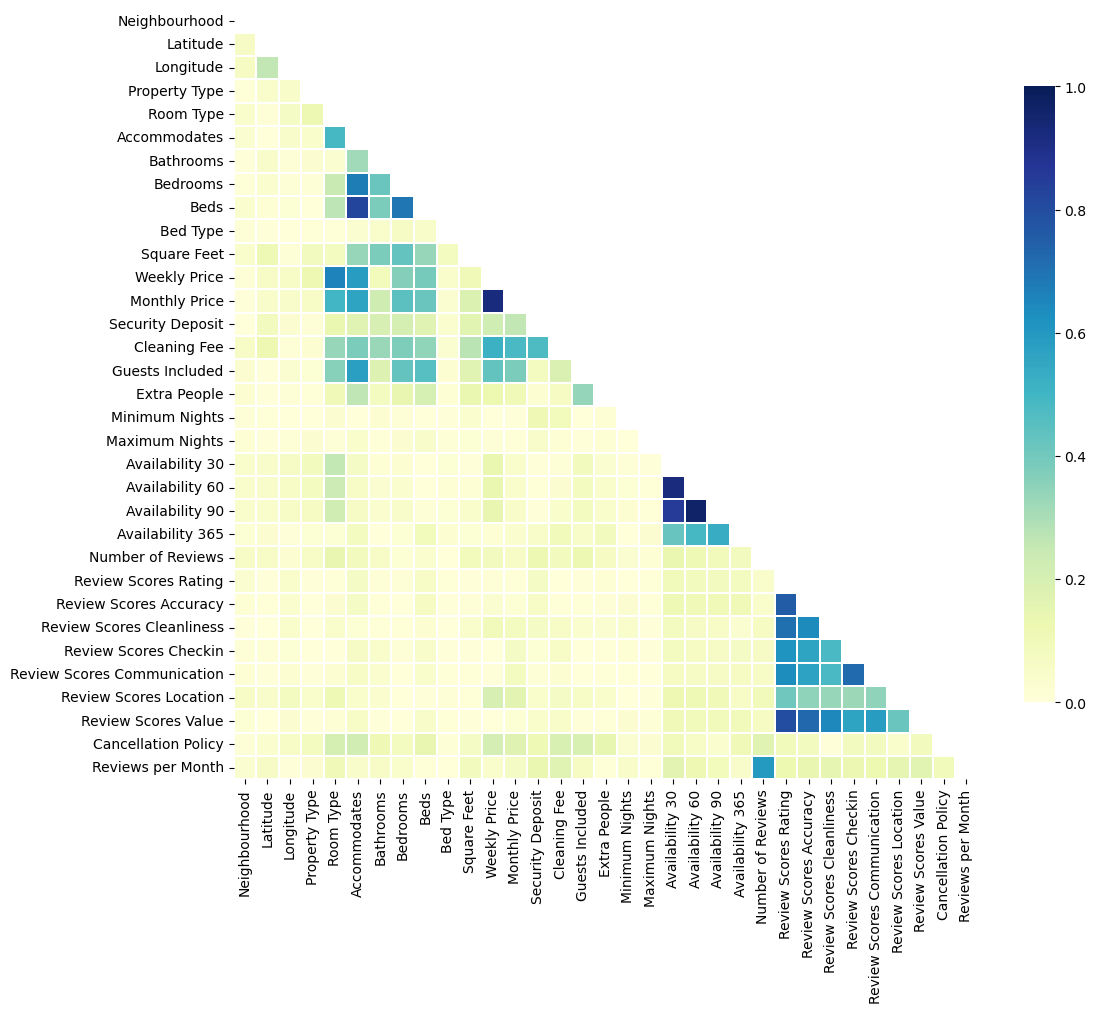

In [29]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que Weekly Price y Monthly Price están altamente correlacionadas y puedo deducirlas a través de la variable precio, por tanto las elimino. También elimino Accommodates por su alta correlación con Beds.

In [30]:
data = data.drop(['Weekly Price', 'Monthly Price', 'Accommodates'], axis = 1)

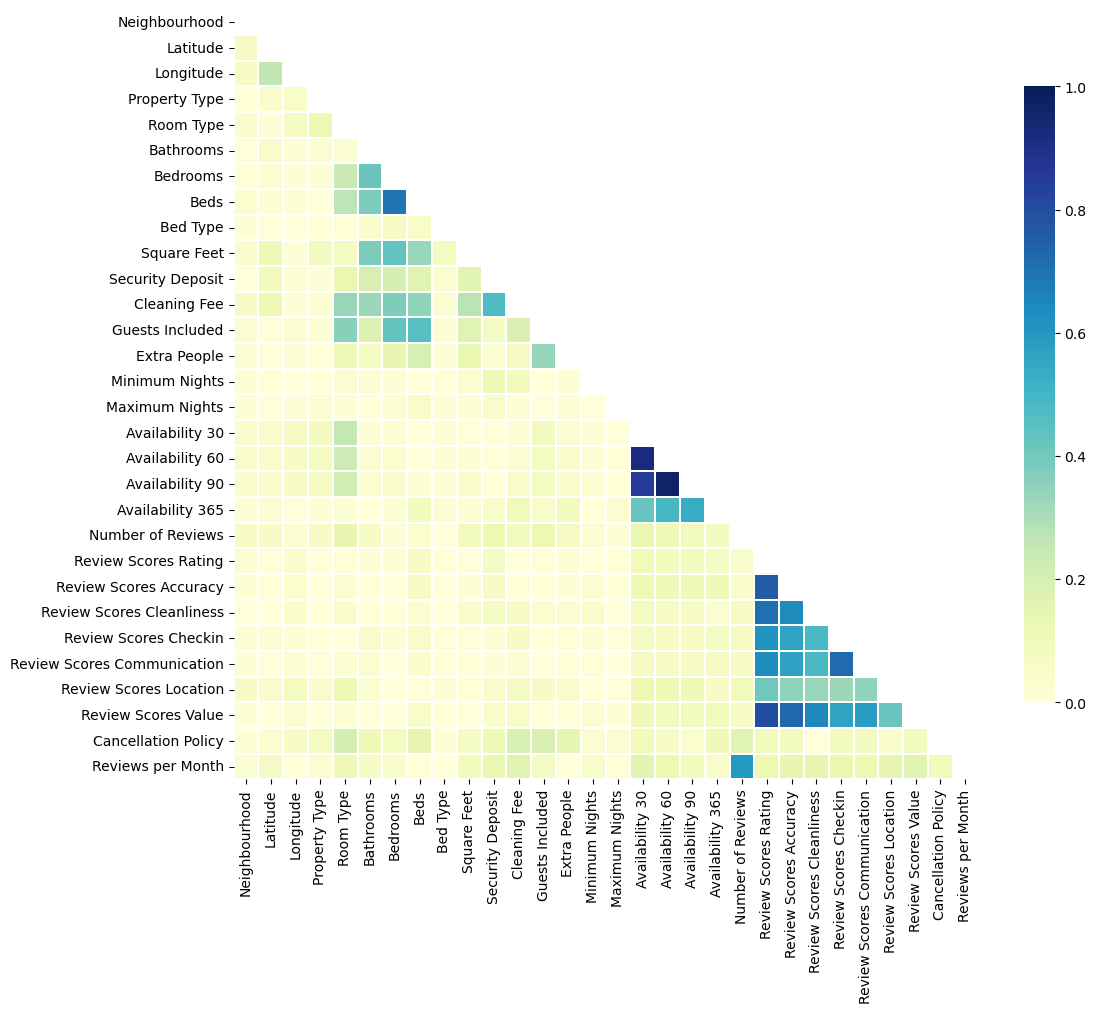

In [31]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

También elimino Availability 30, Availability 60 y Availability 90.

In [32]:
data = data.drop(['Availability 30', 'Availability 60', 'Availability 90'], axis = 1)

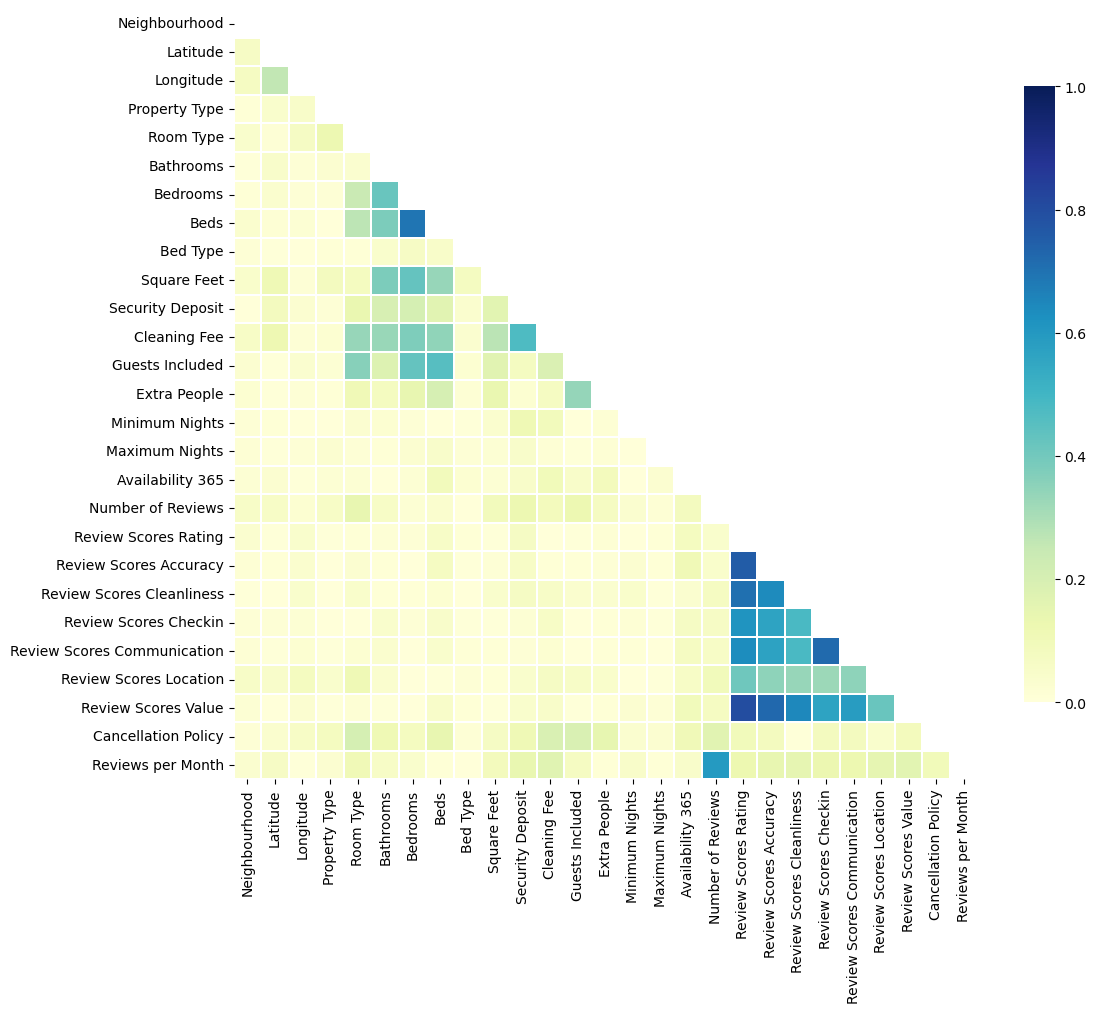

In [33]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

La variable Reviews por Month la puedo deducir de Number of reviews, así que la elimino.

In [34]:
data = data.drop(['Reviews per Month'], axis = 1)

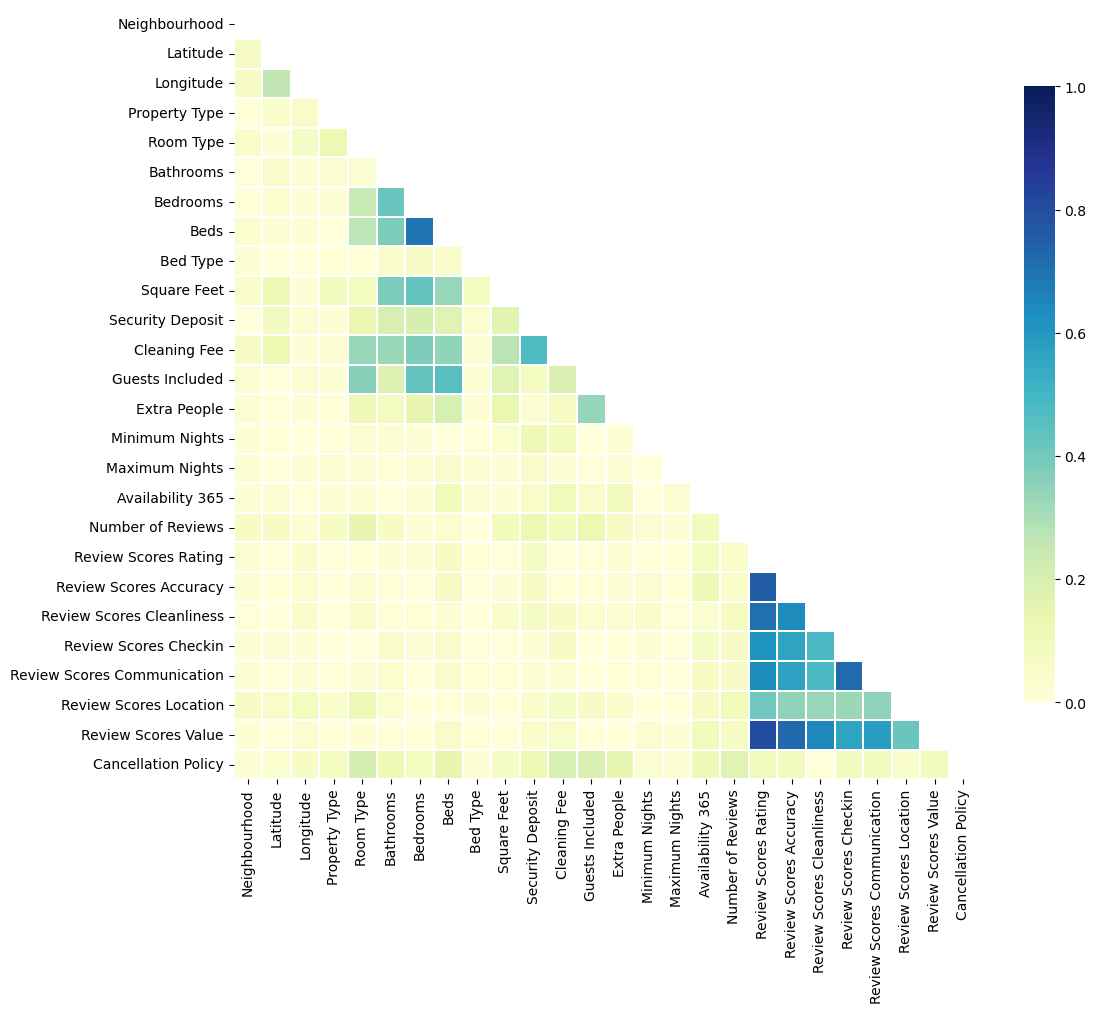

In [35]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

La variable Square Feet tiene 10.138 valores faltantes de 10.565 valores posibles, por tanto, la elimino. 

In [36]:
print(data.shape)
data.select_dtypes(exclude = 'object').isnull().sum()

(10565, 27)


Neighbourhood                      0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Bathrooms                         42
Bedrooms                          20
Beds                              43
Bed Type                           0
Square Feet                    10138
Price                              7
Security Deposit                6086
Cleaning Fee                    4309
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 365                   0
Number of Reviews                  0
Review Scores Rating            2289
Review Scores Accuracy          2304
Review Scores Cleanliness       2298
Review Scores Checkin           2313
Review Scores Communication     2299
Review Scores Location          2315
Review Scores Value             2315
Cancellation Policy                0
d

In [37]:
data = data.drop(['Square Feet'], axis = 1)

In [38]:
data.select_dtypes(exclude = 'object').describe()

,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
count,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10523.000000,10545.000000,10522.000000,10565.000000,10558.000000,4479.000000,6256.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,8276.000000,8261.000000,8267.000000,8252.000000,8266.000000,8250.000000,8250.000000,10565.000000
mean,44.656981,40.420679,-3.697294,1.960814,0.418173,1.253587,1.293789,1.981753,3.971320,65.771832,182.905336,29.535166,1.568102,7.403691,3.014576,867.373971,204.721912,22.973213,91.609836,9.408667,9.321761,9.618396,9.644447,9.543273,9.209818,1.047799
std,19.619340,0.020151,0.023352,4.759174,0.521092,0.603839,0.832743,1.509860,0.214115,56.347456,107.433671,25.960698,1.080018,11.145815,13.923215,1503.100709,127.258563,38.299584,8.964766,0.919281,1.002906,0.796256,0.754741,0.764329,0.954905,0.836890
min,0.000000,40.332908,-3.835498,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,70.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,30.000000,40.410114,-3.707852,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,31.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,83.000000,1.000000,88.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000
50%,47.000000,40.418822,-3.701568,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,52.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,245.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000
75%,65.000000,40.427905,-3.693932,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,80.000000,200.000000,35.000000,2.000000,14.000000,3.000000,1125.000000,321.000000,28.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000
max,65.000000,40.514247,-3.573613,21.000000,2.000000,8.000000,10.000000,16.000000,4.000000,875.000000,990.000000,500.000000,16.000000,276.000000,1125.000000,99999.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Relleno los valores faltantes de las columnas numéricas con su media.

In [39]:
data.fillna(data.mean(), inplace=True)

## 4. Modelado

In [40]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn import preprocessing
features = data.drop(['Price'], axis=1).columns

y_train = data['Price'].values     # nos quedamos con la columna Price
X_train = data[features].values

# Escalamos
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Ahora, en test, hacemos todas las transformaciones que hemos hecho en train.

In [41]:
data_test = pd.read_csv('madrid_test.csv', sep=';')

columnas_a_eliminar = data_test.columns[data_test.columns.str.contains('Host|Url')]
data_test = data_test.drop(columnas_a_eliminar, axis = 1)

data_test = data_test.drop(['City', 'State', 'Country', 'Country Code', 'Smart Location'], axis = 1)

data_test = data_test.drop(['Name', 'Space', 'Description', 'Summary', 'Market', 'Neighborhood Overview'], axis = 1)

data_test = data_test.drop(['Experiences Offered'], axis = 1)

data_test = data_test.drop(['Neighbourhood Group Cleansed', 'Neighbourhood Cleansed'], axis = 1)

data_test = data_test.drop(['Last Scraped','Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Street','Zipcode', 'Amenities', 
                  'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Geolocation', 'Features'], axis = 1)

#Factorizamos variables categóricas
data_test['Property Type'] = le_property_type.fit_transform(data_test['Property Type'])
data_test['Room Type'] = le_room_type.fit_transform(data_test['Room Type'])
data_test['Bed Type'] = le_bed_type.fit_transform(data_test['Bed Type'])
data_test['Cancellation Policy'] = le_cancellation_policy.fit_transform(data_test['Cancellation Policy'])
data_test['Neighbourhood'] = le_neighbourhood.fit_transform(data_test['Neighbourhood'])

data_test = data_test.drop(['Has Availability', 'Jurisdiction Names', 'Calculated host listings count', 'ID', 'Scrape ID', 'Weekly Price', 'Monthly Price', 'Accommodates',
                            'Availability 30', 'Availability 60', 'Availability 90', 'Reviews per Month', 'Square Feet' ], axis = 1)

data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,2642.0,42.895534,18.485574,0.000000,28.000000,46.000000,62.000000,62.000000
Latitude,2642.0,40.420026,0.019545,40.331888,40.409969,40.417363,40.427439,40.511377
Longitude,2642.0,-3.696538,0.023292,-3.819501,-3.707484,-3.701612,-3.693041,-3.576025
Property Type,2642.0,1.617335,3.845961,0.000000,0.000000,0.000000,0.000000,16.000000
Room Type,2642.0,0.407646,0.522846,0.000000,0.000000,0.000000,1.000000,2.000000
Bathrooms,2635.0,1.249336,0.582974,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,2639.0,1.296703,0.802923,0.000000,1.000000,1.000000,2.000000,7.000000
Beds,2636.0,2.003035,1.518010,1.000000,1.000000,2.000000,2.000000,16.000000
Bed Type,2642.0,2.973505,0.192775,0.000000,3.000000,3.000000,3.000000,3.000000
Price,2640.0,66.535985,54.638384,9.000000,30.000000,55.000000,80.000000,650.000000


In [42]:
data_test.fillna(data_test.mean(), inplace = True)

In [43]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,2642.0,42.895534,18.485574,0.000000,28.000000,46.000000,62.000000,62.000000
Latitude,2642.0,40.420026,0.019545,40.331888,40.409969,40.417363,40.427439,40.511377
Longitude,2642.0,-3.696538,0.023292,-3.819501,-3.707484,-3.701612,-3.693041,-3.576025
Property Type,2642.0,1.617335,3.845961,0.000000,0.000000,0.000000,0.000000,16.000000
Room Type,2642.0,0.407646,0.522846,0.000000,0.000000,0.000000,1.000000,2.000000
Bathrooms,2642.0,1.249336,0.582200,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,2642.0,1.296703,0.802467,0.000000,1.000000,1.000000,2.000000,7.000000
Beds,2642.0,2.003035,1.516285,1.000000,1.000000,2.000000,2.000000,16.000000
Bed Type,2642.0,2.973505,0.192775,0.000000,3.000000,3.000000,3.000000,3.000000
Price,2642.0,66.535985,54.617692,9.000000,30.000000,55.000000,80.000000,650.000000


In [44]:
# convertimos el DataFrame al formato necesario para scikit-learn
features = data_test.drop(['Price'], axis=1).columns

y_test = data_test['Price'].values     # nos quedamos con la columna Price
X_test = data_test[features].values

# Escalamos
XtestScaled = scaler.transform(X_test)

Voy a probar con Random Forest y Bagging Regressor.

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=1; total time=   1.0s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=3; total time=   1.4s
[CV] END ........................................max_depth=3; total time=   1.4s
[CV] END ........................................max_depth=3; total time=   1.4s
[CV] END ........................................max_depth=4; total time=   2.3s
[CV] END ........................................max_depth=4; total time=   2.3s
[CV] END .......................................

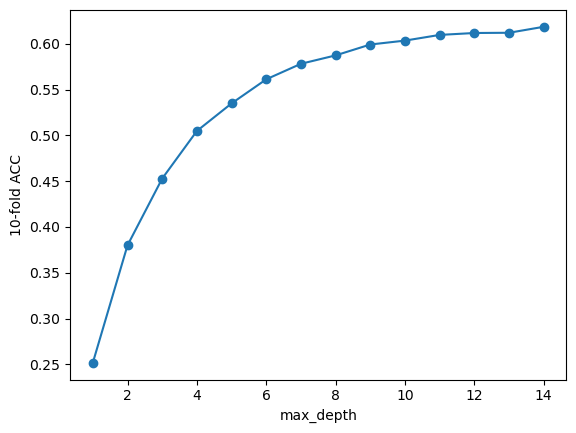

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [48]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8770128091398096
Test:  0.677086116038521


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................base_estimator__max_depth=1; total time=   1.3s
[CV] END ........................base_estimator__max_depth=1; total time=   1.4s
[CV] END ........................base_estimator__max_depth=1; total time=   1.3s
[CV] END ........................base_estimator__max_depth=2; total time=   1.9s
[CV] END ........................base_estimator__max_depth=2; total time=   1.8s
[CV] END ........................base_estimator__max_depth=2; total time=   1.8s
[CV] END ........................base_estimator__max_depth=3; total time=   2.3s
[CV] END ........................base_estimator__max_depth=3; total time=   2.5s
[CV] END ........................base_estimator__max_depth=3; total time=   2.3s
[CV] END ........................base_estimator__max_depth=4; total time=   3.0s
[CV] END ........................base_estimator__max_depth=4; total time=   3.0s
[CV] END ........................base_estimator_

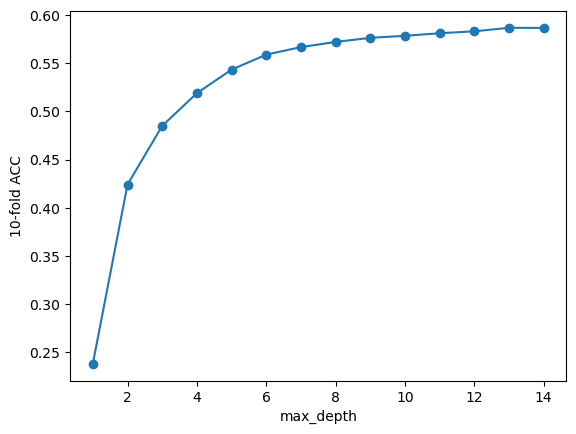

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [50]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.8809811199754258
Test:  0.6756124373201192


Podemos observar que Random Forest es ligeramente mejor que Bagging Regressor. Veamos la importancia de las variables para cada uno de estos modelos.

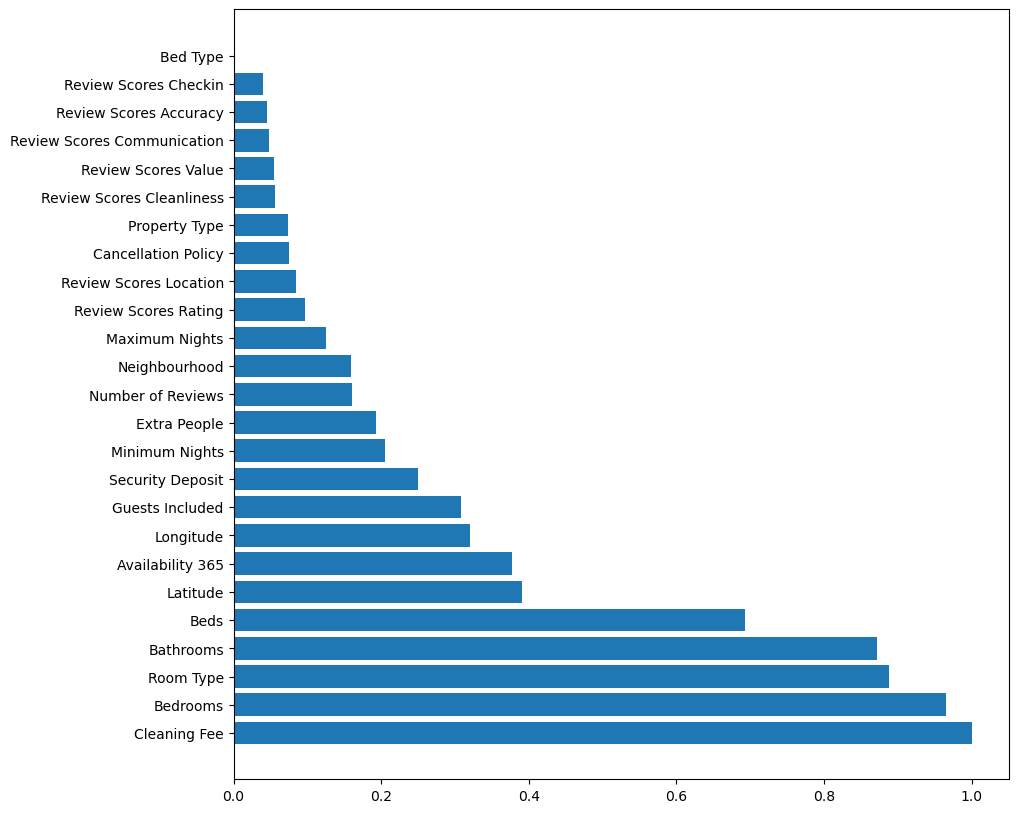

In [51]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

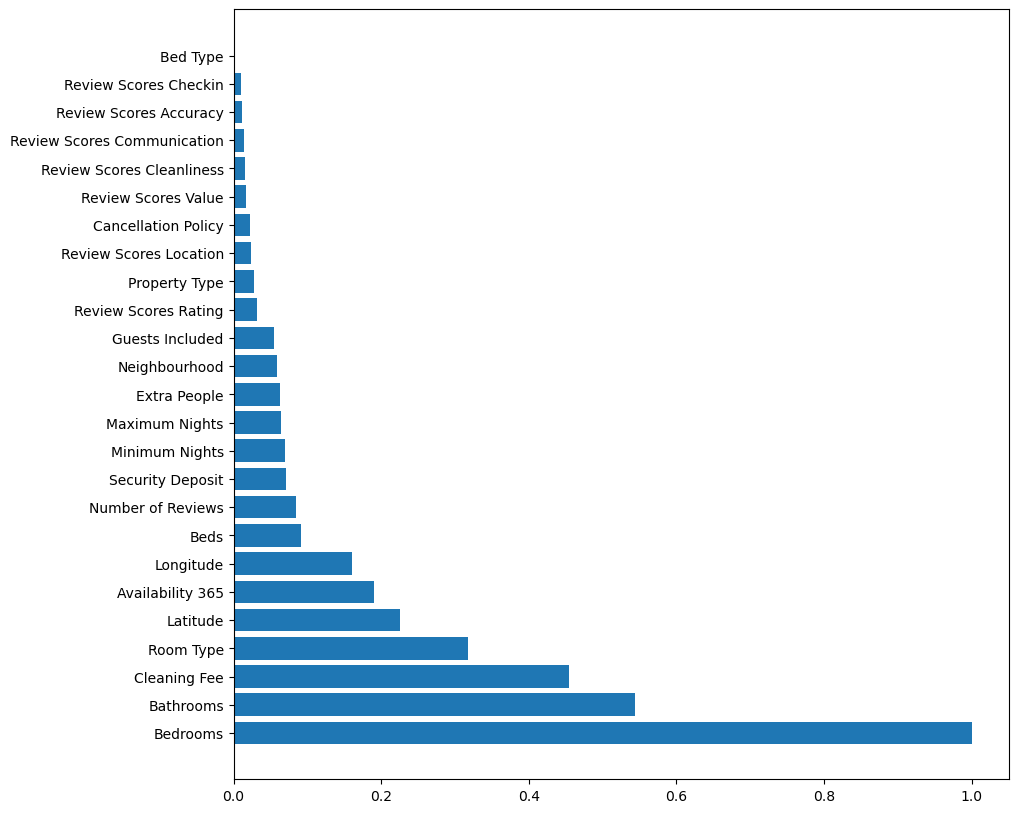

In [52]:
importances = np.mean([tree.feature_importances_ for tree in baggingModel.estimators_], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Ambos dan mucha importancia al número baños, camas y tipo de habitación, lo cuál parece razonable ya que cuánto mayor sean estas variables mayor será el precio del alojamiento. En ambos, la variable de menor importancia es Bed Type.